Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


Load Dataset

In [5]:
df=pd.read_csv('breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Preprocessing

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

drop that irrelavent data

In [7]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.duplicated().sum()

np.int64(0)

Feature & Target Separation

In [10]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

Feature Scaling and encoding the target data

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

Data Splitting and optional use StratifiedKFold

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Visualization

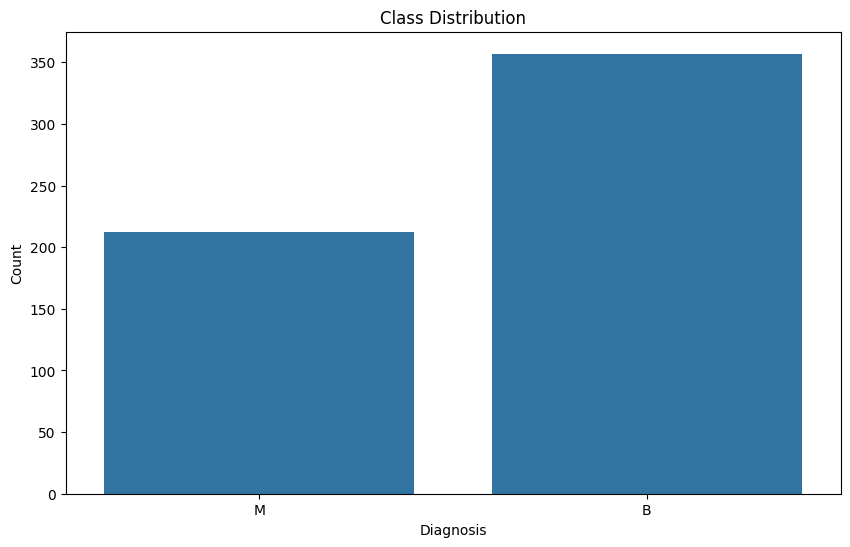

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Feature Correlation (Heatmap)

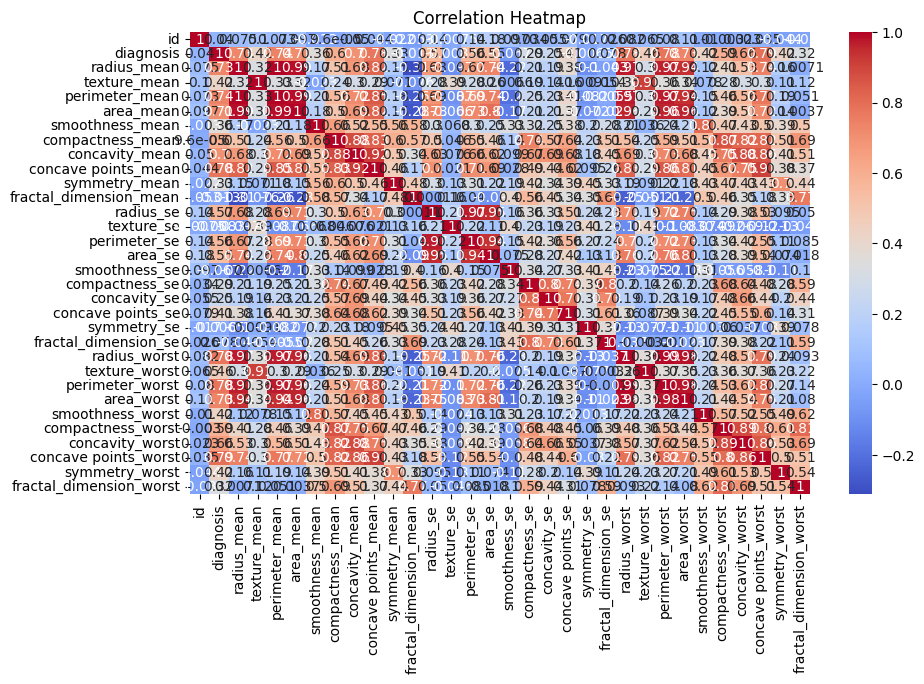

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Histogram (Single Feature)

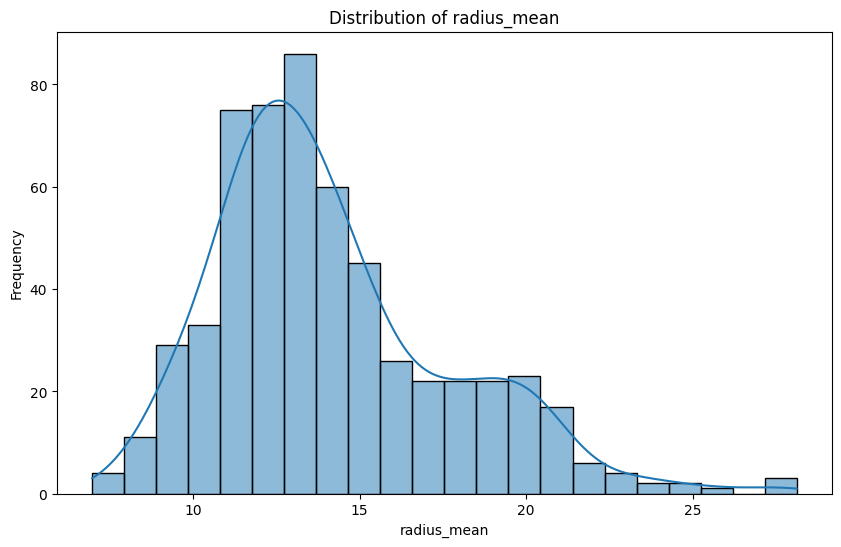

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['radius_mean'],kde=True)
plt.title('Distribution of radius_mean')
plt.xlabel('radius_mean')
plt.ylabel('Frequency')
plt.show()

Scatter Plot (Feature Relationship)

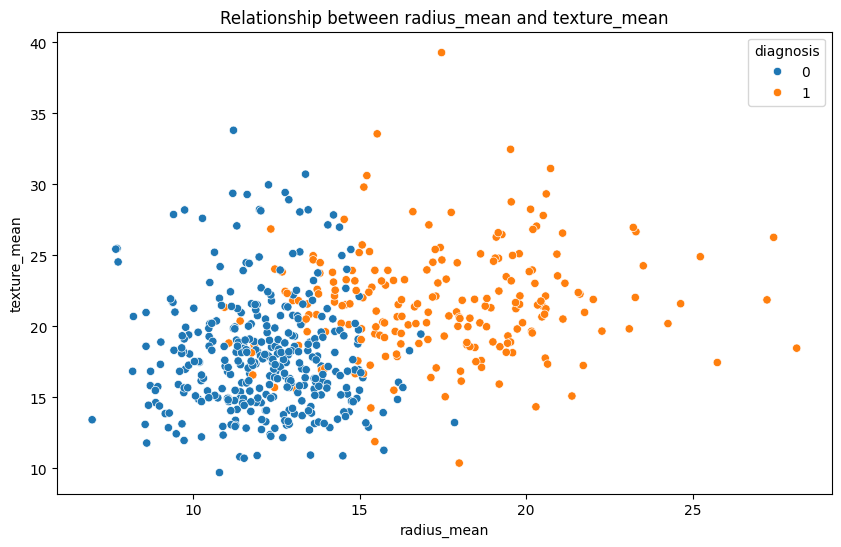

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='radius_mean',y='texture_mean',data=df,hue='diagnosis')
plt.title('Relationship between radius_mean and texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

Boxplot (Class-wise Comparison)

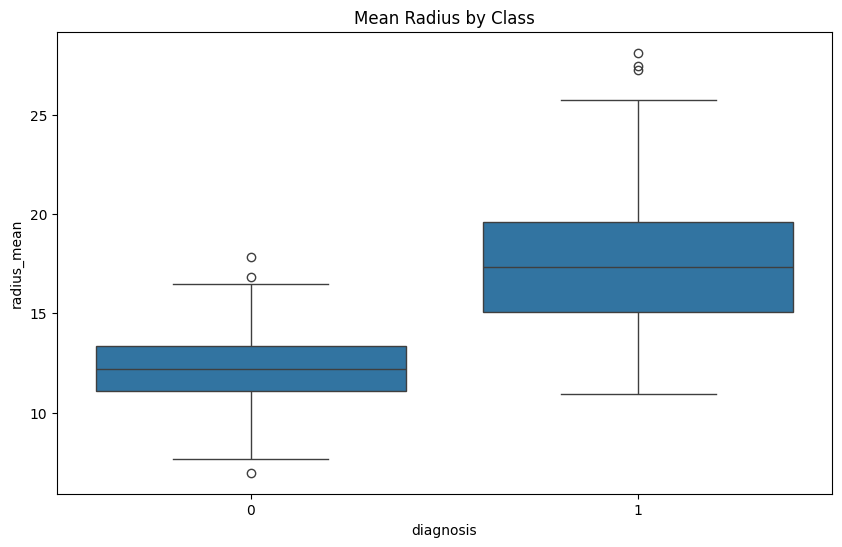

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='diagnosis',y='radius_mean',data=df)
plt.title('Mean Radius by Class')
plt.show()

Model Building (2 Models)

In [18]:
lr_model=LogisticRegression()
rf_model=RandomForestClassifier()

Train and evaluate using accuracy

In [19]:
lr_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)
acc_lr=accuracy_score(y_test,lr_model.predict(x_test))
acc_rf=accuracy_score(y_test,rf_model.predict(x_test))
print(f'Logistic Regression Accuracy: {acc_lr*100:.2f}%')
print(f'Random Forest Accuracy: {acc_rf*100:.2f}%')

Logistic Regression Accuracy: 97.37%
Random Forest Accuracy: 96.49%


confusion matrix

In [20]:
conf_lr=confusion_matrix(y_test,lr_model.predict(x_test))
conf_rf=confusion_matrix(y_test,rf_model.predict(x_test))
print('Logistic Regression Confusion Matrix:')
print(conf_lr)
print('\nRandom Forest Confusion Matrix:')
print(conf_rf)

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]

Random Forest Confusion Matrix:
[[70  1]
 [ 3 40]]


hyperparameter tuning

In [21]:
param_grid={'n_estimators':[100,200],'max_depth':[None,10,20]}
grid_search=GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,cv=skf,scoring='accuracy')
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_

In [22]:
grid_search_lr=GridSearchCV(estimator=LogisticRegression(),param_grid={'C':[0.001,0.01,0.1,1,10,100]},cv=skf,scoring='accuracy')
grid_search_lr.fit(x_train,y_train)
best_params_lr=grid_search_lr.best_params_

Tuned Model Evaluation

In [23]:
y_pred=grid_search.predict(x_test)
acc_tuned=accuracy_score(y_test,y_pred)
print(f'Tuned Random Forest Accuracy: {acc_tuned*100:.2f}%')

Tuned Random Forest Accuracy: 96.49%


In [24]:
y_pred_lr=grid_search_lr.predict(x_test)
acc_tuned_lr=accuracy_score(y_test,y_pred_lr)
print(f'Tuned Logistic Regression Accuracy: {acc_tuned_lr*100:.2f}%')

Tuned Logistic Regression Accuracy: 98.25%


After tuning, both models performed very well. Logistic Regression achieved higher accuracy (98.25%) than Random Forest (96.49%), showing that the data works well with a simple linear model and that the preprocessing was done correctly.